In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from lib.ekyn import *
from lib.env import *
import copy
from sage.utils import *

MODEL_ID = f'2024_26_08_14_13_14'

state = torch.load(f'{EXPERIMENTS_PATH}/{MODEL_ID}/state.pt',map_location='cpu',weights_only=False)
model = copy.deepcopy(state['model'])
# model.load_state_dict(state['best_model_wts'])
trainloader,testloader = get_epoched_dataloaders_loo(batch_size=state['batch_size'],robust=state['robust'],fold=state['fold'])
loss,y_true,y_pred = evaluate(dataloader=testloader,model=model,criterion=state['criterion'],device='cuda')

train_ids ['F1-1', 'C1-0', 'A1-1', 'E1-0', 'A4-0', 'B1-0', 'E4-0', 'F1-0', 'C4-1', 'D1-0', 'B3-1', 'A1-0', 'C4-0', 'F5-1', 'E4-1']
test_ids ['E2-1']
507 training batches 34 testing batches
259584 training samples 17408 testing samples
721.07 training hours 48.36 testing hours


In [14]:
model.cpu()
Xi,yi = next(iter(testloader))
x,embedding = model(Xi,return_embedding=True)
x.shape,embedding.shape

(torch.Size([512, 3]), torch.Size([512, 16]))

In [5]:
print(loss)

0.20949563088224216


Text(0.5, 1.0, 'f1 : 0.642')

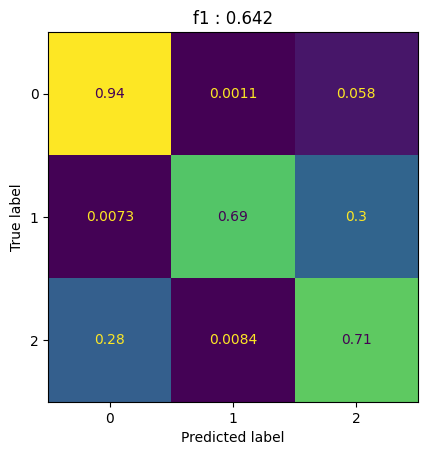

In [16]:
ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='true',colorbar=False)
plt.title(f'f1 : {f1_score(y_true,y_pred,average="macro"):.3f}')